# 

Exercise 2.8 in Introduction to Statistical learning

In [66]:
import numpy as np, pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
import statsmodels.api as sm
from ISLP import load_data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import (cross_val_score,
                                     cross_validate)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures)
from ISLP.models import (summarize, 
                        poly,
                        ModelSpec as MS)
from sklearn.pipeline import (Pipeline,
                              make_pipeline)
from statsmodels.stats.anova import anova_lm
from pygam import (s as s_gam,
                   l as l_gam,
                   f as f_gam,
                   LinearGAM,
                   LogisticGAM)
from ISLP.transforms import (BSpline,
                             NaturalSpline)
from ISLP.models import bs, ns
from ISLP.pygam import (approx_lam,
                        degrees_of_freedom,
                        plot as plot_gam,
                        anova as anova_gam)
import warnings; warnings.simplefilter('ignore')


In [44]:
import pandas as pd

college = pd.read_csv("College.csv")


In [45]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [46]:
college2 = pd.read_csv("College.csv", index_col = 0)
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')
college3
college = college3

In [47]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<Axes: xlabel='Top10perc', ylabel='Top10perc'>,
        <Axes: xlabel='Apps', ylabel='Top10perc'>,
        <Axes: xlabel='Enroll', ylabel='Top10perc'>],
       [<Axes: xlabel='Top10perc', ylabel='Apps'>,
        <Axes: xlabel='Apps', ylabel='Apps'>,
        <Axes: xlabel='Enroll', ylabel='Apps'>],
       [<Axes: xlabel='Top10perc', ylabel='Enroll'>,
        <Axes: xlabel='Apps', ylabel='Enroll'>,
        <Axes: xlabel='Enroll', ylabel='Enroll'>]], dtype=object)

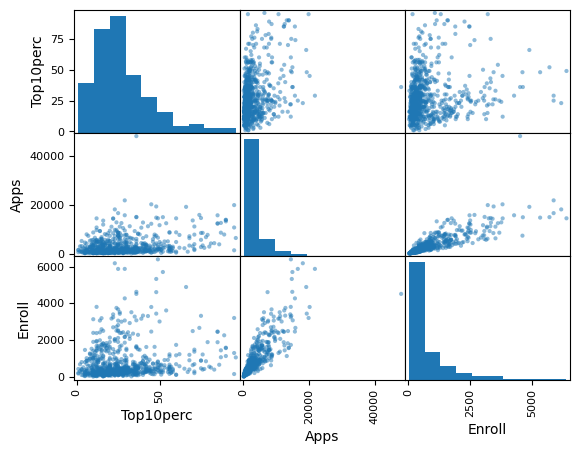

In [48]:
pd.plotting.scatter_matrix(college[['Top10perc','Apps','Enroll']])

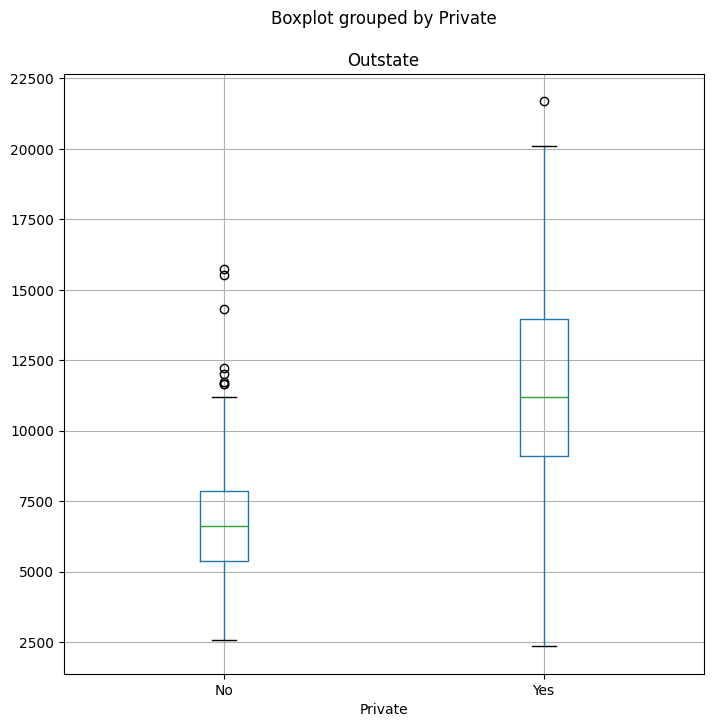

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
college.boxplot('Outstate',by='Private', ax=ax);

In [50]:
college['Elite'] = pd.cut(college['Top10perc'], [0,50,100], labels=['No','Yes'])
college['Elite'].value_counts()

Elite
No     699
Yes     78
Name: count, dtype: int64

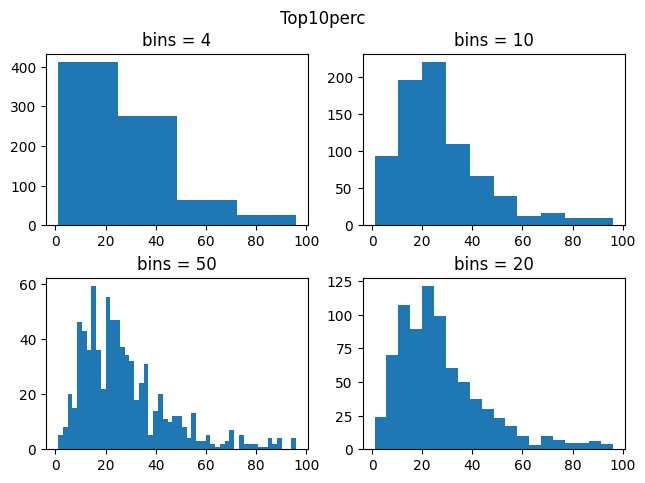

In [51]:
fig, ax = plt.subplots(2,2)
ax[0,0].hist(college['Top10perc'], bins=4)
ax[0,0].set_title('bins = 4')

ax[0,1].hist(college['Top10perc'], bins=10)
ax[0,1].set_title('bins = 10')

ax[1,0].hist(college['Top10perc'], bins=50)
ax[1,0].set_title('bins = 50')

ax[1,1].hist(college['Top10perc'], bins=20)
ax[1,1].set_title('bins = 20')
plt.suptitle('Top10perc')
fig.tight_layout(pad=0.5)


Exercise 2.9

This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

In [52]:
import pandas as pd
import numpy as np

Auto = pd.read_csv('Auto.csv', na_values=['?'])
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


a)

Which of the predictors are quantitative, and which are qualitative?

**Solution** 
We see that the features mpg, cylinders, displacement, horsepower, weight, acceleration, year and origin are quantitative since they take on numerical values and name is qualitative.

b)

What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy.

In [53]:
name = []
value = []
i = 0
for series_name, series in Auto.items():
    if (i < 8):
        name.append(series_name)
        value.append(np.max(series) - np.min(series))
    i += 1
print(name)
print(value)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
[37.6, 5, 387.0, 184.0, 3527, 16.8, 12, 2]


c)

What is the mean and standard deviation of each quantitative predictor?

In [54]:
name = []
mean = []
SD = []
i = 0
for series_name, series in Auto.items():
    if (i < 8):
        name.append(series_name)
        mean.append(np.mean(series))
        SD.append(np.std(series))
    i += 1
print(name)
print(mean)
print(SD)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
[23.51586901763224, 5.458438287153652, 193.53274559193954, 104.46938775510205, 2970.2619647355164, 15.55566750629723, 75.99496221662469, 1.5743073047858942]
[7.815941538224255, 1.699432585509141, 104.24803997948825, 38.442032714425984, 846.8355568478047, 2.746529639056109, 3.6853546098832153, 0.8015380908636408]


d)

Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [55]:
val = list(range(11,85))
Auto_new = Auto.drop(val)

name = []
mean = []
SD = []
i = 0
for series_name, series in Auto_new.items():
    if (i < 8):
        name.append(series_name)
        mean.append(np.mean(series))
        SD.append(np.std(series))
    i += 1
print(name)
print(mean)
print(SD)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
[24.38018575851393, 5.386996904024768, 188.28482972136223, 101.45141065830721, 2938.7461300309596, 15.682972136222912, 77.10835913312694, 1.5944272445820433]
[7.906119663834363, 1.6586627712844197, 100.39858329865314, 36.27572039063554, 809.2209554535058, 2.7165678735506513, 3.1471680868677265, 0.8137174737337232]


e)

Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

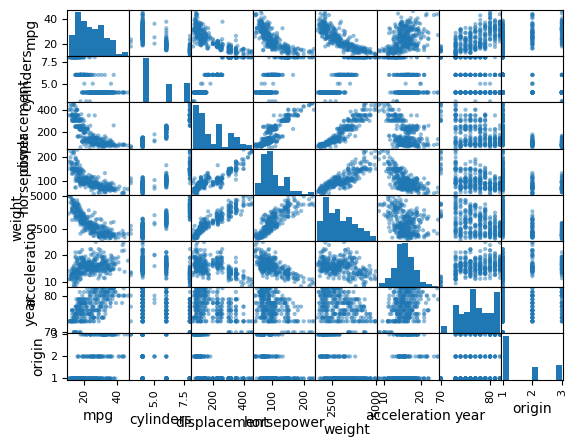

In [56]:
pd.plotting.scatter_matrix(Auto_new[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']])

f)

Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer.

**Ans:**

Yes our scatter plot shows there is a relationship between mpg and with displacement, horsepower, weight and year. We see that with if displacement, horsepower and weight increase then mpg decreases. Similar with year, when year increases then the mpg increases.
________________________________________________________________________________________________________________________________________

3.9

This question involves the use of multiple linear regression on the
 $\verb|Auto|$ data set.

a.


Produce a scatterplot matrix which includes all of the variables
 in the data set.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

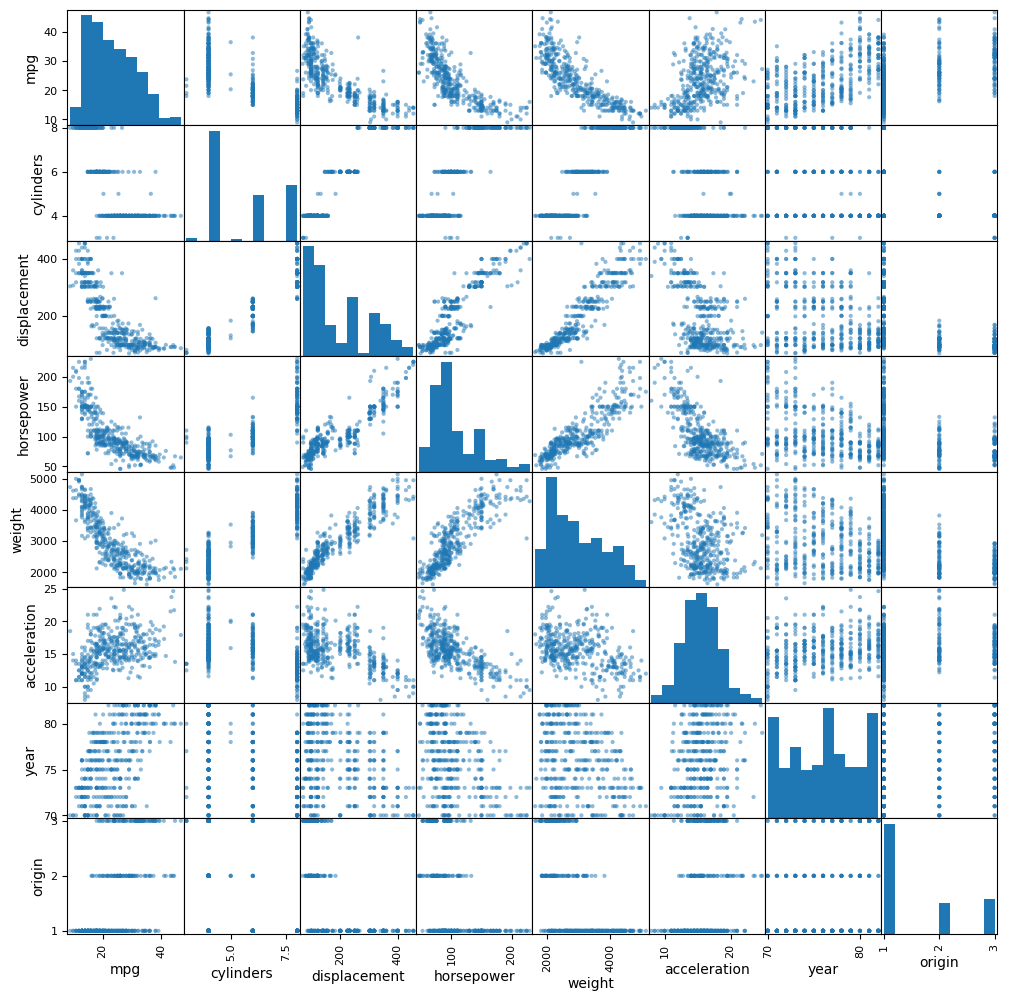

In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv('Auto.csv', na_values=['?'])
df
pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(12,12))

b.

Compute the matrix of correlations between the variables using
 the $DataFrame.corr()$ method.

In [58]:
df.corr

<bound method DataFrame.corr of       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
392  27.0          4         140.0        86.0    2790          15.6    82   
393  44.0          4          97.0        52.0    2130          24.6    82   
394  32.0          4         135.0        84.0    2295          11.6    82   
395  28.0          4         120.0        79.0    2625          18.6    82   
396  31.0          4         119.0        82.0    2720          19.4    82   

     origin                    

c.

Use the $sm.OLS()$ function to perform a multiple linear regression
 with $\verb|mpg|$ as the response and all other variables except name as
 the predictors. Use the $summarize()$ function to print the results.
 Comment on the output. For instance:

In [72]:
import statsmodels.api as sm
from ISLP.models import (summarize,poly)
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.anova import anova_lm

df = df.dropna()
y = df['mpg']
X = df.drop(columns=['mpg','name'])
X.insert(0,'Intercept', np.ones(X.shape[0]),True)
model = sm.OLS(y,X)
results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
Intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [60]:
result = smf.ols('y~X',data=df).fit()

i.

Is there a relationship between the predictors and the re
sponse? Use the $\verb|anova_lm()|$ function from $\verb|statsmodels|$ to
 answer this question.

In [61]:
table = anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
X,8.0,19575.989106,2446.998638,220.978484,1.327873e-138
Residual,384.0,4252.212530,11.073470,NaN,NaN


ii.

Which predictors appear to have a statistically significant relationship to the response?

**Ans:**

All predictors except cylinder, horspwer and acceleration since the p-value is larger that $0.05$
________________________________________

iii.

What does the coefficient for the $\verb|year|$ variable suggest?

**Ans:**

With increasing year the mpg increases on the vehicle, i.e. the more miles the car can drive each gallon used.
___________________________________________

d.

Produce some of diagnostic plots of the linear regression fit as
 described in the lab. Comment on any problems you see with the
 fit. Do the residual plots suggest any unusually large outliers?
 Does the leverage plot identify any observations with unusually
 high leverage?

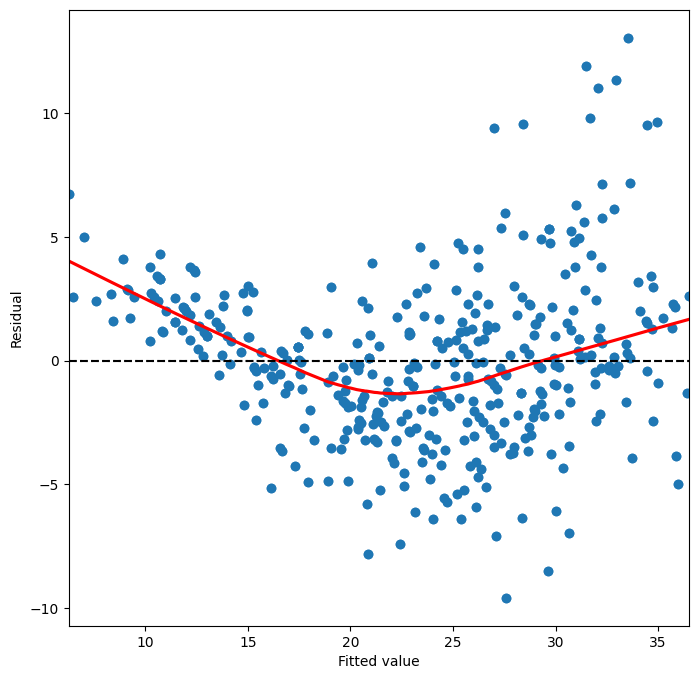

In [62]:
from matplotlib.pyplot import subplots

def abline(ax, b, m, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
sns.residplot(data=df,x=results.fittedvalues,y='mpg',lowess=True, line_kws=dict(color="r"))
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0,c='k',ls='--')

Text(0.5, 1.0, 'Leverage Plot')

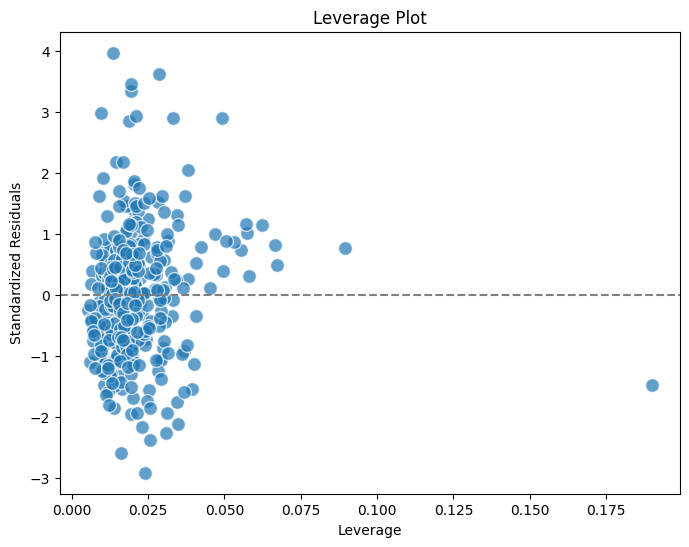

In [74]:
influence = OLSInfluence(results)
leverage = influence.hat_matrix_diag

# Plot leverage against the residuals
residuals = results.resid
standardized_residuals = residuals / np.std(residuals)

plt.figure(figsize=(8, 6))
plt.scatter(leverage, standardized_residuals, alpha=0.7, edgecolors='w', s=100)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage Plot')

In [64]:
np.argmax(infl.hat_matrix_diag)
infl.hat_matrix_diag[13]

0.18991288602615608

e. 

Fit some models with interactions as described in the lab. Do
 any interactions appear to be statistically significant?

In [67]:
X1 = MS(['displacement', 'horsepower',('displacement', 'horsepower')]).fit_transform(X)
X2 = MS(['displacement', 'cylinders',('displacement', 'cylinders')]).fit_transform(X)
X3 = MS(['weight', 'horsepower',('weight', 'horsepower')]).fit_transform(X)
X4 = MS(['cylinders', 'year', ('cylinders','year')]).fit_transform(X)
model1 = sm.OLS(y,X1)
model2 = sm.OLS(y,X2).fit()
model3 = sm.OLS(y,X3).fit()
model4 = sm.OLS(y,X4).fit()
results1 = model1.fit()


print(results1.pvalues)

intercept                  3.020057e-121
displacement                4.320329e-39
horsepower                  2.802363e-28
displacement:horsepower     1.681625e-25
dtype: float64


In [68]:
print(model2.tvalues)
summarize(model2)

intercept                 20.544507
displacement              -8.320917
cylinders                 -4.524024
displacement:cylinders     5.710973
dtype: float64


,coef,std err,t,P>|t|
intercept,48.2204,2.347,20.545,0.0
displacement,-0.1344,0.016,-8.321,0.0
cylinders,-2.4184,0.535,-4.524,0.0
displacement:cylinders,0.0118,0.002,5.711,0.0


In [69]:
print(model3.pvalues)

intercept            1.234344e-91
weight               5.137202e-36
horsepower           2.322587e-18
weight:horsepower    9.933617e-15
dtype: float64


In [70]:
print(model4.pvalues)

intercept         5.471026e-05
cylinders         4.477560e-02
year              5.988064e-11
cylinders:year    1.994514e-03
dtype: float64


f. 

 Try a few different transformations of the variables, such as
 $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [89]:
model1 = smf.ols('mpg ~ horsepower + cylinders + acceleration', data=df)
summarize(model1.fit())

,coef,std err,t,P>|t|
Intercept,52.0572,2.449,21.258,0.0
horsepower,-0.1158,0.013,-8.671,0.0
cylinders,-1.7259,0.253,-6.822,0.0
acceleration,-0.4547,0.116,-3.916,0.0


A model where mpg is the response and horsepower, cylinders and acceleration are the predictors
_______________________________________________________________________________________________________________________

In [87]:
model = smf.ols('mpg ~ np.power(horsepower,2) + np.log(cylinders) + np.sqrt(acceleration)', data=df)
summarize(model.fit())

,coef,std err,t,P>|t|
Intercept,56.2133,4.195000,13.399,0.000
"np.power(horsepower, 2)",-0.0003,0.000046,-5.668,0.000
np.log(cylinders),-14.3718,1.251000,-11.486,0.000
np.sqrt(acceleration),-1.4743,0.934000,-1.579,0.115


A model where the change is horsepower when squared has little effect on the response and also shows that the square root of the acceleration in this model is statistically insignificant
_______________________________________________________________________________________________________________________________

In [88]:
model = smf.ols('mpg ~ horsepower + cylinders + np.sqrt(acceleration)', data=df)
summarize(model.fit())

,coef,std err,t,P>|t|
Intercept,61.2712,4.276,14.330,0.0
horsepower,-0.1204,0.013,-8.930,0.0
cylinders,-1.7008,0.252,-6.748,0.0
np.sqrt(acceleration),-4.0582,0.932,-4.355,0.0


Now only square root of the acceleration shows that it has a higher effect on the response if other variables are held constant, then it would otherwise.
______________________________________________________________________________________________________________________________________________

In [90]:
model1 = smf.ols('mpg ~ np.power(horsepower,2) + np.power(cylinders,2) + np.power(acceleration,2)', data=df)
summarize(model1.fit())

,coef,std err,t,P>|t|
Intercept,34.1074,1.197000,28.492,0.000
"np.power(horsepower, 2)",-0.0002,0.000048,-4.526,0.000
"np.power(cylinders, 2)",-0.2185,0.021000,-10.345,0.000
"np.power(acceleration, 2)",-0.0032,0.003000,-0.925,0.356


A model that shows all variables have a low effect on the mpg response variable, and acceleration squared is statistically insignficant
_____________________________________________________________________________________________________________________________

In [91]:
model1 = smf.ols('mpg ~ np.log(horsepower) + np.log(cylinders) + np.log(acceleration)', data=df)
summarize(model1.fit())

,coef,std err,t,P>|t|
Intercept,148.5625,8.600,17.274,0.0
np.log(horsepower),-18.2415,1.347,-13.544,0.0
np.log(cylinders),-6.3512,1.236,-5.138,0.0
np.log(acceleration),-11.3390,1.665,-6.809,0.0


A model that shows the logarithm of all predictors has a higher effect on the response if any two predictors are held constant. And all are statistically significant.
____________________________________________________________________________________________________________________

In [92]:
model1 = smf.ols('mpg ~ np.sqrt(horsepower) + np.sqrt(cylinders) + np.sqrt(acceleration)', data=df)
summarize(model1.fit())

,coef,std err,t,P>|t|
Intercept,89.9415,4.827,18.633,0.0
np.sqrt(horsepower),-3.1820,0.280,-11.349,0.0
np.sqrt(cylinders),-6.1884,1.146,-5.402,0.0
np.sqrt(acceleration),-5.1355,0.898,-5.721,0.0


Similar as the model above except horsepower and acceleration have a lower effect then above.
________________________________________________________________________________________________________________________

3.10

This question should be answered using the Carseats data set.

array([[<Axes: xlabel='Sales', ylabel='Sales'>,
        <Axes: xlabel='CompPrice', ylabel='Sales'>,
        <Axes: xlabel='Income', ylabel='Sales'>,
        <Axes: xlabel='Advertising', ylabel='Sales'>,
        <Axes: xlabel='Population', ylabel='Sales'>,
        <Axes: xlabel='Price', ylabel='Sales'>,
        <Axes: xlabel='Age', ylabel='Sales'>,
        <Axes: xlabel='Education', ylabel='Sales'>],
       [<Axes: xlabel='Sales', ylabel='CompPrice'>,
        <Axes: xlabel='CompPrice', ylabel='CompPrice'>,
        <Axes: xlabel='Income', ylabel='CompPrice'>,
        <Axes: xlabel='Advertising', ylabel='CompPrice'>,
        <Axes: xlabel='Population', ylabel='CompPrice'>,
        <Axes: xlabel='Price', ylabel='CompPrice'>,
        <Axes: xlabel='Age', ylabel='CompPrice'>,
        <Axes: xlabel='Education', ylabel='CompPrice'>],
       [<Axes: xlabel='Sales', ylabel='Income'>,
        <Axes: xlabel='CompPrice', ylabel='Income'>,
        <Axes: xlabel='Income', ylabel='Income'>,
        <A

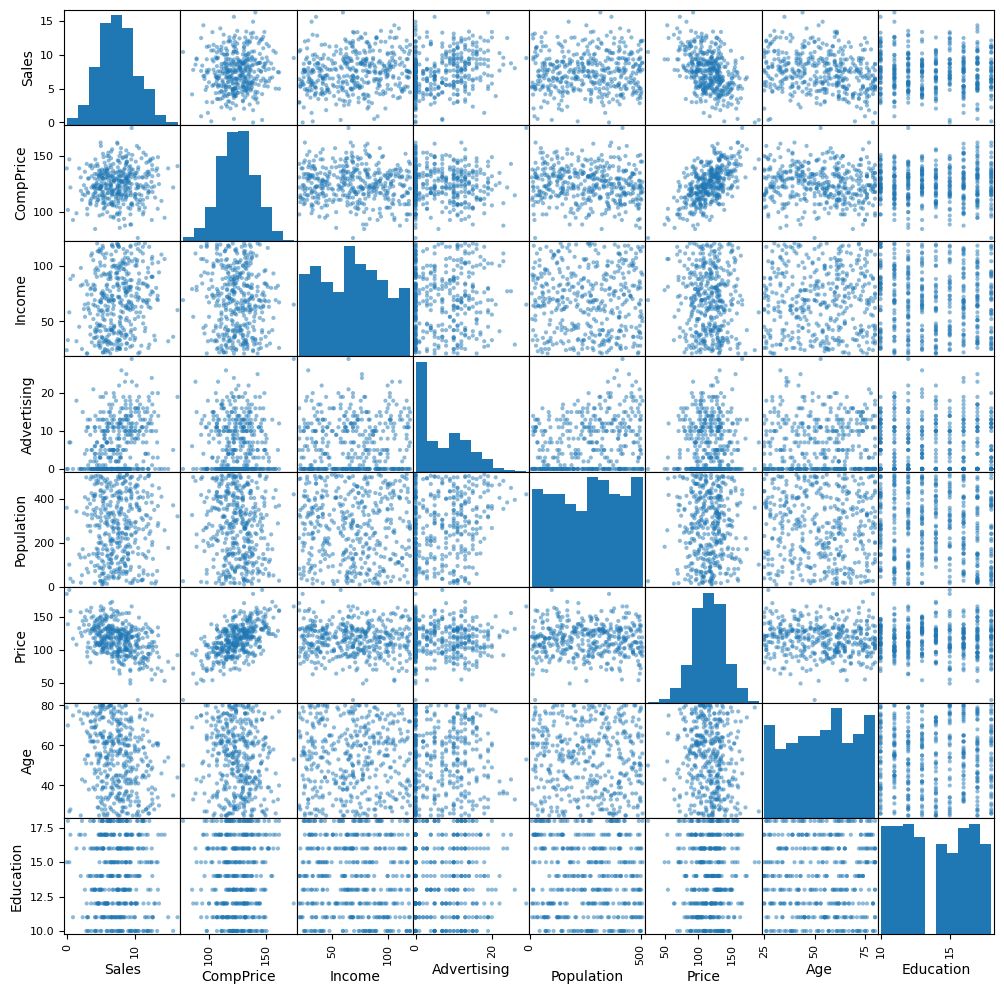

In [75]:
from ISLP import load_data
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,summarize)
import numpy as np
from matplotlib.pyplot import subplots
import seaborn as sns
import pandas as pd

Carseats = load_data('Carseats')
Carseats.loc[Carseats['US'] == 'No']
pd.plotting.scatter_matrix(Carseats, alpha=0.5, figsize=(12,12))

a.

Fit a multiple regression model to predict Sales using Price,
 Urban, and US.

In [76]:
X = MS(['Price', 'Urban','US']).fit_transform(Carseats)
y = Carseats['Sales']

# Fit the model using linear regression
model = sm.OLS(y,X).fit()
X

,intercept,Price,Urban[Yes],US[Yes]
0,1.0,120,1.0,1.0
1,1.0,83,1.0,1.0
2,1.0,80,1.0,1.0
3,1.0,97,1.0,1.0
4,1.0,128,1.0,0.0
...,...,...,...,...
395,1.0,128,1.0,1.0
396,1.0,120,0.0,1.0
397,1.0,159,1.0,1.0
398,1.0,95,1.0,1.0


b.

Provide an interpretation of each coefficient in the model. Be
 careful—some of the variables in the model are qualitative!

In [77]:
summarize(model)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


The intercept $\beta_0$ can be interpreted as the average sales of a childs carseat without change in price, and when a store is in a rural location and outside US.

The Price $\beta_1$ will decrease sales if price increases.

The Urban $\beta_2$ as the difference in price if a store is located in an urban environment or a rural one.

US $\beta_3$ the difference in sales in the US and outside

c.

Write out the model in equation form, being careful to handle
 the qualitative variables properly.

First let's define $X_1 = price$, $X_2=Urban$ and $X_3=US$. We can let

$$
x_{i2} = \begin{cases} 
      1 & \text{If ith store is in an urban location } \\
      0 & \text{If ith store is in a rural location}
   \end{cases}
$$
and
$$
x_{i3} = \begin{cases} 
      1 & \text{If ith store is in US} \\
      0 & \text{If ith store is outside US}
   \end{cases}
$$
Then our equation is
$$
yi = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} = \begin{cases} 
      \beta_0 + \beta_1 x_{i1} + \beta_2 + \beta_3 & \text{If ith store is in US urban} \\
      \beta_0 + \beta_1 x_{i1} + \beta_3 & \text{If ith store is in US rural} \\
      \beta_0 + \beta_1 x_{i1} + \beta_3 & \text{If ith store is outside US and in an urban location} \\
      \beta_0 + \beta_1 x_{i1} & \text{If ith store is outside US in a rural location}
   \end{cases}
$$

d.

For which of the predictors can you reject the null hypothesis
 $H_0 : \beta_j =0$?

For all other predictors except Urban. All others are statistically significant while Urban appears to not have effect on the response.

e.

On the basis of your response to the previous question, fit a
 smaller model that only uses the predictors for which there is
 evidence of association with the outcome.

In [78]:
X1 = MS(['Price','US']).fit_transform(Carseats)

model1 = sm.OLS(y,X1).fit()

summarize(model1)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


f.

How well do the models in (a) and (e) fit the data?

In [79]:
print("Model 1 R squared value '{0}'".format(model.rsquared) + "and a mse value '{}'".format(model.mse_model))

Model 1 R squared value '0.23927539218405525'and a mse value '253.81334211384242'


In [80]:
print("Model 2 without US has an R squared value '{0}'".format(model1.rsquared) + "and a mse value '{}'".format(model1.mse_model))

Model 2 without US has an R squared value '0.23926288842678567'and a mse value '380.7001179755707'


g.

Using the model from (e), obtain 95% confidence intervals for
 the coefficient(s).

In [81]:
model1.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


h.

Is there evidence of outliers or high leverage observations in the
 model from (e)

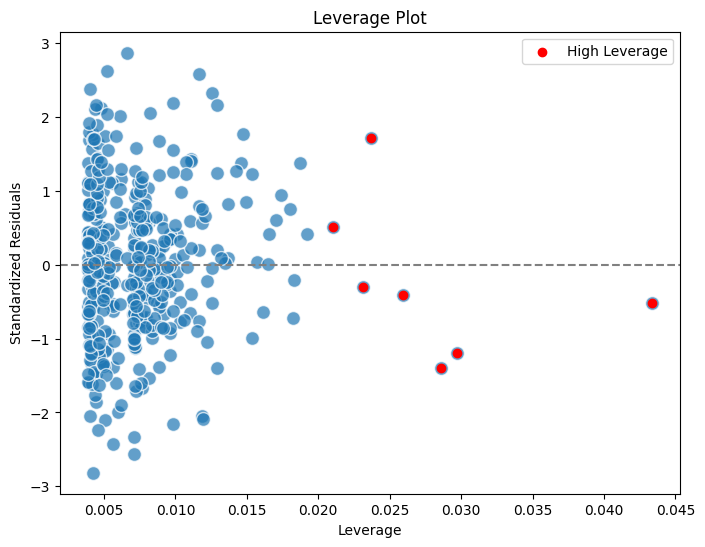

In [84]:
n = X1.shape[0]
p = X1.shape[1]
influence = OLSInfluence(model1)
leverage = influence.hat_matrix_diag

# Plot leverage against the residuals
residuals = model1.resid
standardized_residuals = residuals / np.std(residuals)

plt.figure(figsize=(8, 6))
plt.scatter(leverage, standardized_residuals, alpha=0.7, edgecolors='w', s=100)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Leverage')
plt.ylabel('Standardized Residuals')
plt.title('Leverage Plot')

# Identify high leverage points
leverage_threshold = (2 * (p + 1)) / n
high_leverage = leverage > leverage_threshold
plt.scatter(leverage[high_leverage], standardized_residuals[high_leverage], color='red', label='High Leverage')

plt.legend()
plt.show()